<a href="https://colab.research.google.com/github/IamHeeJ/ML_Ex/blob/main/7_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#신경망 모델 훈련

In [ ]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

##손실 곡선

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

model = model_fn()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 모델 훈련
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=5, verbose=0) #verbose=0: 훈련과정을 출력하지 않음

history 객체에는 훈련 측정값이 들어있는 history 딕셔너리가 들어있음

In [ ]:
print(history.history.keys()) # 앞의 history가 모델 변수명인 history임

dict_keys(['loss', 'accuracy'])


history 속성에 포함된 손실과 정확도는 에포크마다 계산한 값이 순서대로 나열된 단순한 리스트


맷플롯립으로 그래프 그려보기

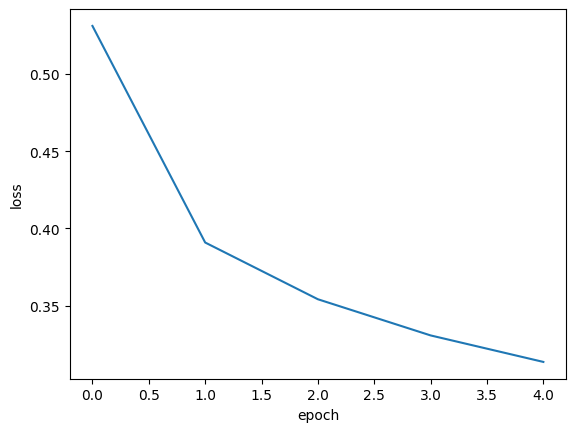

In [ ]:
# 맷플롯립으로 손실 그래프 그려보기
import matplotlib.pyplot as plt

plt.plot(history.history['loss']) #손실 그래프
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

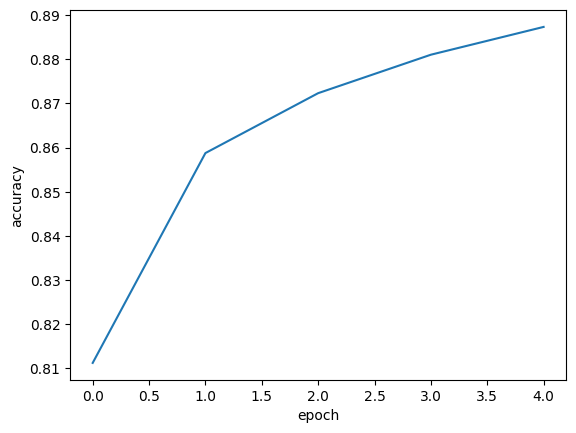

In [ ]:
# 맷플롯립으로 정확도 그래프 그려보기
plt.plot(history.history['accuracy']) #정확도그래프
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
# 에포크 횟수를 20으로 늘려서 모델 훈련
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

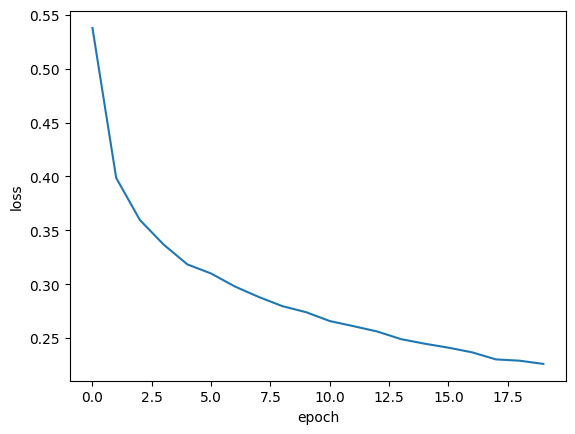

In [ ]:
# 손실 함수 출력
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

##검증 손실

**정확도** : 100개중 30개맞힘 => 30%

매개변수를 미세하게 조정할 때 약간 변경했을 때 훈련 데이터에서 정확도가 크게 변하지 않을것 (의미있는 변화x)

즉, 정확도는 약간의 매개변수 변화로는 값의 변화를 확인할 수 없음  


---

인공 신경망 모델이 최적화하는 대상은 정확도가 아니라 **손실 함수**

손실 감소에 완벽하게 비례하여 정확도가 높아지는건 아니지만 손실함수를 기준으로 최적화를 수행함

**손실 함수를 지표로 삼는 이유?**
- ex) 100개의 훈련 데이터 중 30개만 올바르게 예측하면 정확도는 30%
- 이때 가중치 매개변수를 약간 조정한다고 해도 정확도는 그대로 30%로서, 약간의 매개변수 조정은 정확도에 의미있는 변화를 주지x
- 정확도는 30.000003%같읕 연속적인 값보다는 32%, 33%처럼 불연속적인 값으로 표현되기 때문에 정확도에 의미있는 변화를 주기 위해 가중치 매개변수의 변화 폭이 크거나 훈련 데이터가 많아야 함
- 하지만, **손실함수**는 불연속적인 값으로 표현되어 정확도에 비해 매개변수가 약간 바껴도 값이 바로 반영됨
- 손실함수는 훈련 데이터에 따라서 결정되는 값이 아니기 때문



**한마디로 검증 손실이 정확도보다 더 미세하게 값을 반영하므로,  정확도가 아니라 손실 함수를 기준으로 그래프를 그릴거임**


★★이거 정확도말고 손실 함수 이용하는 이유랑 설명할줄 알기

---



**신경망 학습에서 최적의 매개변수 찾는 방법**

기울기 계산하고 이를 기반으로 매개변수 값을 조금씩 조정하는 과정 반복

기울기 0이 되면 현 매개변수가 최적값으로 설정

만약, 반복횟수에 제한이 있다면 그 제한 안에서 최소의 기울기를 가지는 매개변수를 최적값으로 설정

In [ ]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


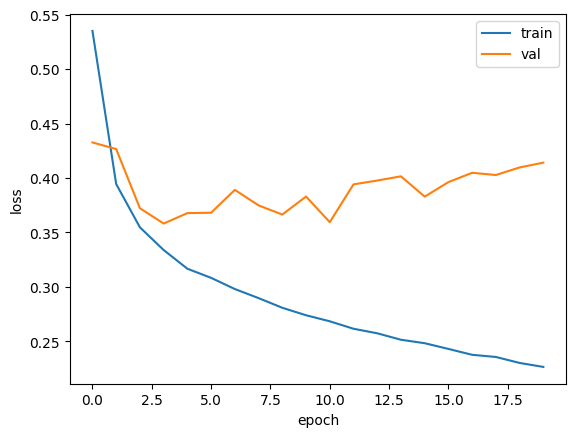

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

=> 검증 손실이 왔다갔다함 에포크를 반복하는게 의미가 없다

검증손실은 감소하다가 점점 상승함

훈련 손실은 꾸준히 갑소하기 때문에 전형적인 과대적합 모델이 만들어짐

★★과대과소적합 기말에서 다시 물어볼수도 있음

검증손실이 상승하는 시점을 뒤로 늦추면 검증셋에 대한 손실이 줄고 정확도 증가할 것

adam을 사용하면 적응적 학습률을 사용하기 때문에 에포크가 진행되면서 학습률의 크기를 조정할 수 있음


In [ ]:
# 옵티마이저를 adam으로 설정하여 훈련 수행해보기
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

# # adam 설정 직접 지정
# adam_lr = keras.optimizers.Adam(learning_rate=0.01)
# model.compile(optimizer=adam_lr, loss='sparse_categorical_crossentropy',
#               metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

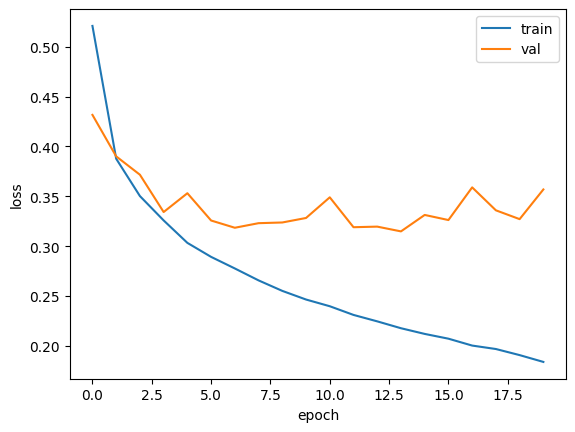

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

=> 과대적합 죄~금 감소함

#드롭아웃

**드롭아웃(dropout)**

- 신경망에서 사용하는 대표적인 규제 방법
- 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서(출력을 0으로 만듬) 과대적합을 막음

.

**드롭아웃이 과대적합을 막을 수 있는 이유** (정론은 아니고 추측)
1. 이전 층의 일부 뉴런이 랜덤하게 꺼지면 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있고, 모든 입력에 대해 주의를 기울여야 함. 즉, 일부 뉴런의 출력이 없을수도 있다는 것을 감안하면 신경망은 더 안정적인 예측을 만들 수 있을 것임
2. 드롭아웃을 적용해 훈련하는 것은 마치 2개의 신경망을 앙상블하는 것처럼 적용될 수 있음


In [ ]:
# 드롭아웃 층 추가
model = model_fn(keras.layers.Dropout(0.3))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


=> 드롭아웃은 Dense층들 사이 중간에 위치함

또한, 입력과 출력 크기가 둘다 100으로 같음

일부 뉴런의 출력을 0으로 만들지만 전체 출력 배열의 크기를 바꾸진 않음

.

훈련이 끝난 뒤에 평가나 예측을 수행할 때는 드롭아웃을 적용하지 않아야 함

텐서플로와 케라스는 모델을 평가와 예측에 사용될 때는 자동으로 드롭아웃을 적용하지 않음


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

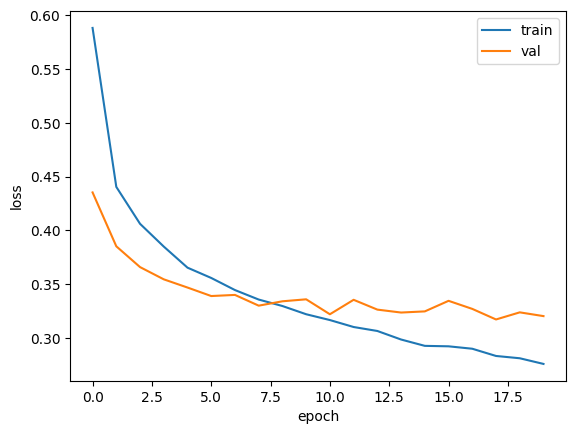

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 모델 저장과 복원

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target))

In [ ]:
model.save_weights('model-weights.h5')

In [ ]:
model.save('model-whole.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


두 파일이 잘 만들어졌는지 확인하기

'!' 명령어 뒤에는 파이썬 명령어가 아니라 리눅스 쉘 명령으로 인식함

In [ ]:
# 파일이 잘 만들어졌는지 확인
!ls -al *.h5

-rw-r--r-- 1 root root 333320 Nov  6 03:31 model-weights.h5
-rw-r--r-- 1 root root 981176 Nov  6 03:31 model-whole.h5


In [ ]:
model = model_fn(keras.layers.Dropout(0.3))

model.load_weights('model-weights.h5') #저장한 모델 파라미터(가중치)를 새 모델에 할당

=> 모델 파라미터만 불러올 경우 훈련을 제외한 모든 것을 다 수행해야함

argmax() : 최대값 출력
  - axis=0 이면 각 행의 최대값 인덱스 선택
  - axis=1 이면 각 열의 최대값 인덱스 선택
  - axis=-1 이면 배열의 마지막 차원을 따라 최대값을 인덱스 선택
    - 2차원이므로 마지막 차원은 1이 되며, 열을 따라 각 행의 최대값의 인덱스를 선택
  - axis 지정되지 않으면 전체에서 최대값의 인덱스 선택



In [ ]:
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

375/375 [==============================] - 1s 2ms/step
0.8746666666666667


In [ ]:
model = keras.models.load_model('model-whole.h5')

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3444 - accuracy: 0.8747


[0.34435054659843445, 0.874666690826416]

## 콜백

콜백 : 훈련과정 중간에 어떤 작업을 수행할 수 있게 하는 객체

fit() 메서드의 callbacks 매개변수에 리스트로 전달하여 사용

ModelCheckpoint 콜백은 기본적으로 에포크마다 모델 저장

save_best_only=True : 가장 낮은 검증 점수를 만드는 모델 저장
  - 기본값은 False: 전체모델 저장
  - True면 가중치와 절편만 저장

monitor : 모니터링할 지표 지정 , 어떤걸로 검증손실 관찰할지



In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                save_best_only=True)

model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

In [ ]:
model = keras.models.load_model('best-model.h5')

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3144 - accuracy: 0.8857


[0.31438207626342773, 0.8857499957084656]

**조기 종료(early stop)**

EarlyStopping
- 케라스에서 제공하는 조기종료 콜백
- patience : 검증점수가 향상되지 않더라도 참고 진행할 에포크 횟수
  - ex) patience=2 : 2번 연속 검증 점수가 향상되지 않으면 훈련 중지
- restore_best_weights : True로 지정하면 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림
- monitor : 모니터링할 지표 지정, 기본값은 val_loss로 검증 손실 관찰

EarlyStopping 콜백을 ModelCheckpoint 콜백과 함께 사용하면 가장 낮은 검증 손실의 모델을 파일에 저장하고 검증 손실이 다시 상승할 때 훈련으 중지할 수 있음

또한 훈련을 중지한 다음 현재 모델의 파라미터를최상의 파라미터로 되돌림


In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, #patience=2 : 손실이 올라가는 순간을 2번까지 참아줄게
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

=> callbacks 매개변수에 체크포인트와 조기종료로 지정해야 되기 때문에 리스트로 넣어햐 하는거임

In [ ]:
print(early_stopping_cb.stopped_epoch)

9


=> 9번째 에포크에서 훈련 중지됨. patience를 2로 지정했으므로 최상의 모델은 7번째 일것임

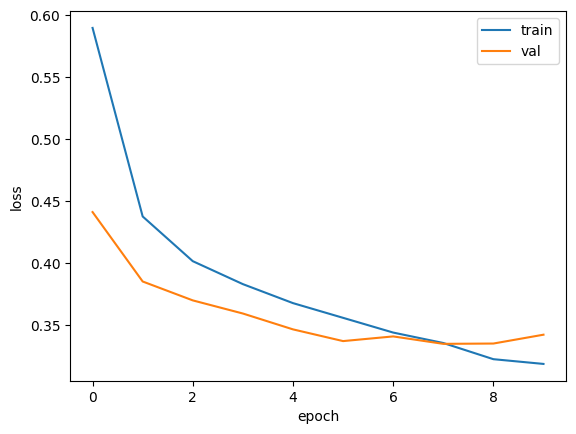

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3349 - accuracy: 0.8782


[0.33488836884498596, 0.878166675567627]

검증손실

드롭아웃

모델저장과 복원

콜백

조기종료

=> 이 다섯가지가 핵심